In [13]:
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [14]:
def modulatore(a,n):
    b=[]
    for i in a:
        i=i / 10 ** n
        b.append(i)
    return b
def Vlog(a):
    b = []
    for val in a:
        if val > 0:
            b.append(math.log10(val))
        elif val < 0:
            b.append(-math.log10(abs(val)))
        else:  # val == 0
            continue  # oppure 0 o None a seconda del contesto
    return b
def divV(a):
    positivo=[]
    negativo=[]
    for i in a:
        if i>0: 
            positivo.append(i)
        elif i<0:
            negativo.append(i)
        else:
            continue
    print(positivo)
    positivo=Vlog(positivo)
    print(positivo)
    negativo=Vlog(negativo)
    return positivo, negativo


In [15]:
#a valle

data=pd.read_excel('esperimento1.xlsx', header=None)
V_pr=data.iloc[:,1]
I_pr=modulatore(data.iloc[:,2],3)
print(I_pr)


V_lamp=data.iloc[:,5]
I_lamp=modulatore(data.iloc[:,6],3)
print(I_lamp)
print(V_lamp)

V_led=data.iloc[:,9]
I_led=modulatore(data.iloc[:,10],6)
print(I_led)


[-3.5999999999999994e-05, -2.9e-05, -2.1000000000000002e-05, -1.4e-05, -7e-06, 0.0, 7e-06, 1.4e-05, 2.1000000000000002e-05, 2.9e-05, 3.5999999999999994e-05]
[-0.09, -0.08, -0.06, -0.05, -0.03, 0.0, 0.03, 0.05, 0.06, 0.07, 0.08]
0    -19.55
1    -15.71
2    -11.62
3     -7.63
4     -3.72
5      0.00
6      3.90
7      7.90
8     11.82
9     15.73
10    19.69
Name: 5, dtype: float64
[5e-06, 3.4e-05, 0.0002, 0.00039, 0.015, nan, nan, nan, nan, nan, nan]


R= 555754.5164718383


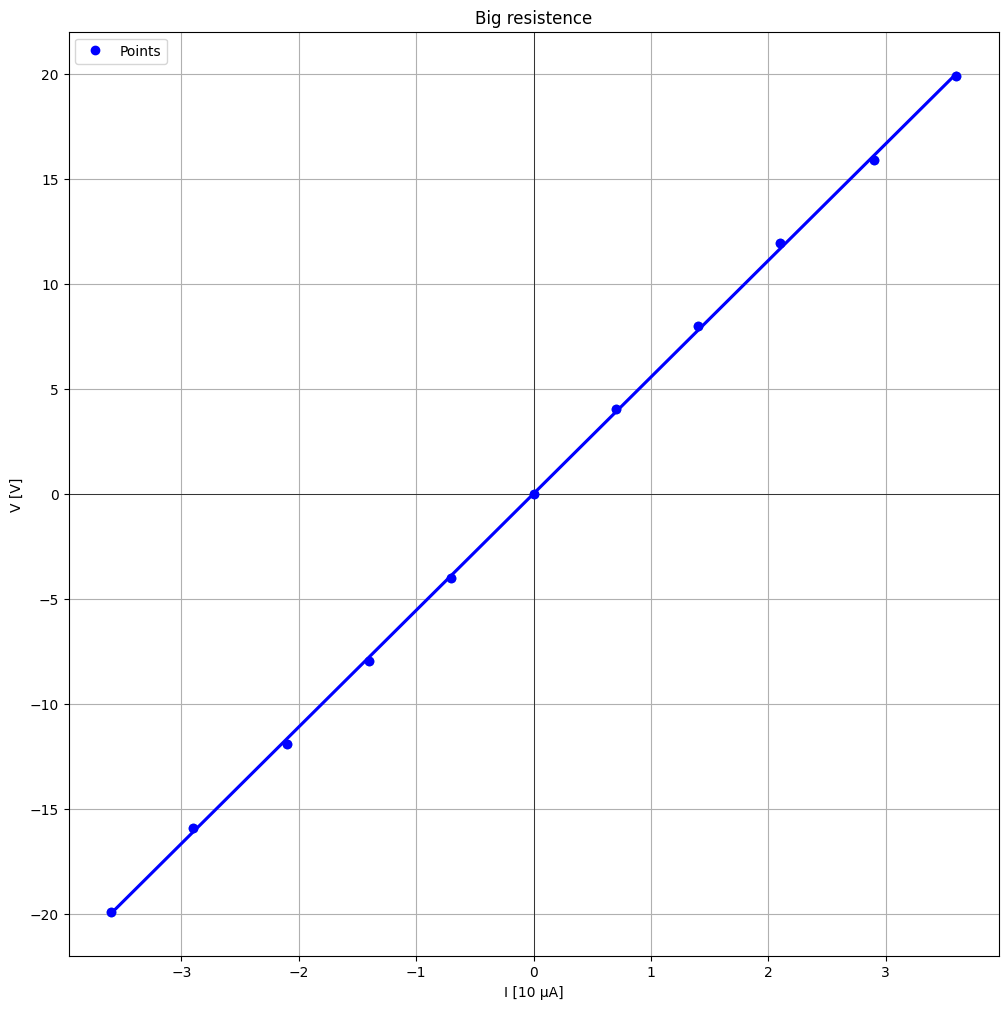

[-19.93 -15.89 -11.92  -7.95  -3.98   0.     4.05   8.01  11.96  15.93
  19.9 ]
Chi-quadro: 0.36149030528451187
Chi-quadro ridotto: 0.040165589476056876


In [16]:
plt.figure(figsize=(12, 12))
plt.errorbar(I_pr, V_pr, fmt='o', color='blue', label='Points', capsize=5)
sns.regplot(x=I_pr, y=V_pr, ci=None, line_kws={"color": "blue"})
plt.xlabel("I [10 µA]")   
plt.ylabel("V [V]")   
plt.title('Big resistence')  


slope, intercept, r_value, p_value, std_err = stats.linregress(I_pr, V_pr)
plt.legend(loc='upper left')
print("R=",slope)

ax = plt.gca()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.get_xaxis().get_offset_text().set_visible(False)

#print(1/intercept)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True) 
plt.show()
I_pr = np.array(I_pr)
V_pr = np.array(V_pr)

print(V_pr)
V_pred = slope * I_pr + intercept

# Se hai un'incertezza nota su V, usala qui
sigma = np.ones_like(V_pr)  # se non hai incertezza, metti 1

# Calcolo chi-quadro
chi2 = np.sum(((V_pr - V_pred) / sigma) ** 2)
dof = len(V_pr) - 2  # gradi di libertà = numero dati - numero parametri stimati
reduced_chi2 = chi2 / dof

print("Chi-quadro:", chi2)
print("Chi-quadro ridotto:", reduced_chi2)

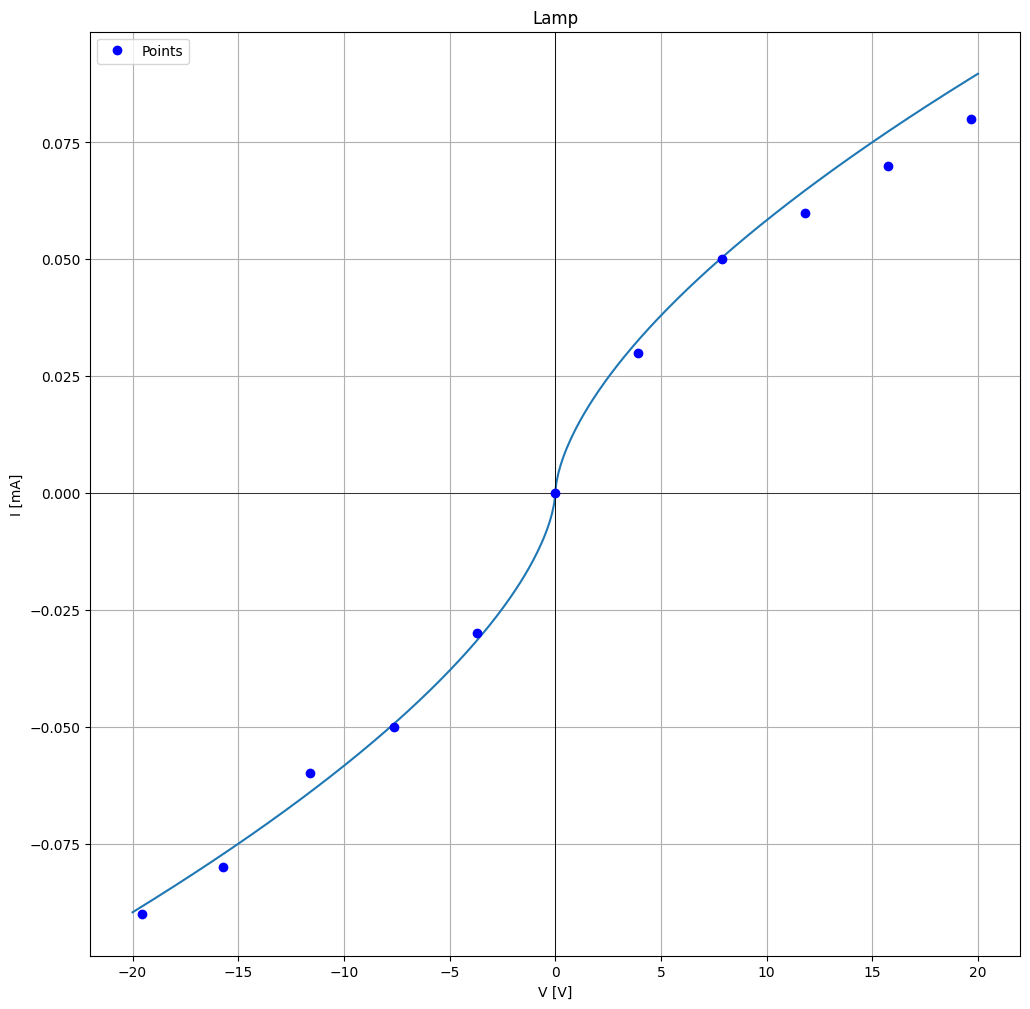

Chi-quadro: 0.04294934201231975
Chi-quadro ridotto: 0.004772149112479972


In [17]:
plt.figure(figsize=(12, 12))
plt.errorbar(V_lamp, I_lamp, fmt='o', color='blue', label='Points', capsize=5)
#sns.regplot(x=I_lamp, y=V_lamp, ci=None, data=data)
plt.xlabel('V [V]')  
plt.ylabel('I [mA]')  
plt.title('Lamp') 
#plt.xscale("log") 
a=0.62
k=0.014
Vplot = np.linspace(-20, 20, 400)
# evita esattamente zero se a<0 o se vuoi evitare problemi numerici
Vplot = Vplot[Vplot != 0]

Iplot = np.sign(Vplot) * k * (np.abs(Vplot) ** a)

plt.plot(Vplot, Iplot)
plt.axvline(0, color='k', linewidth=0.5)






#slope, intercept, r_value, p_value, std_err = stats.linregress(I_lamp, V_lamp)
plt.legend(loc='upper left')

#print(1/intercept)
#ax = plt.gca()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#ax.get_xaxis().get_offset_text().set_visible(False)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True) 
plt.show()


I_lamp = np.array(I_lamp)
V_lamp = np.array(V_lamp)
I_pred = np.sign(V_lamp) * k * (np.abs(V_lamp) ** a)


# Se hai un'incertezza nota su V, usala qui
sigma = np.ones_like(1)  # se non hai incertezza, metti 1

# Calcolo chi-quadro
chi2 = np.sum(((I_pr - I_pred) / sigma) ** 2)
dof = len(I_pr) - 2  # gradi di libertà = numero dati - numero parametri stimati
reduced_chi2 = chi2 / dof

print("Chi-quadro:", chi2)
print("Chi-quadro ridotto:", reduced_chi2)

[3.9, 7.9, 11.82, 15.73, 19.69]
[0.5910646070264992, 0.8976270912904414, 1.0726174765452365, 1.1967287226232868, 1.2942457161381182]
[0.03, 0.05, 0.06, 0.07, 0.08]
[-1.5228787452803376, -1.3010299956639813, -1.2218487496163564, -1.154901959985743, -1.0969100130080565]
[0.5910646070264992, 0.8976270912904414, 1.0726174765452365, 1.1967287226232868, 1.2942457161381182]
-1.860795167238241
1.8967822458198984
0.5950589085161208
0.6583603373341995


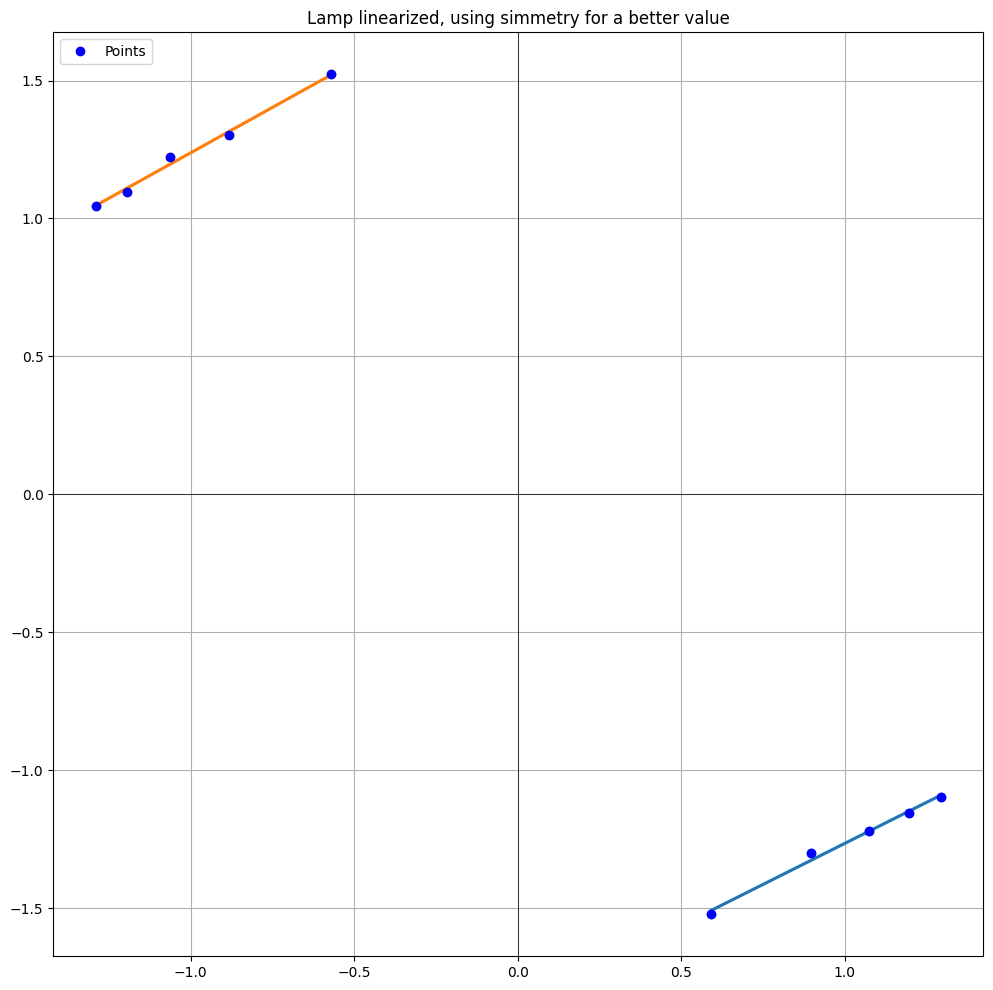

In [18]:

V_log= divV(V_lamp)
I_log=divV(I_lamp)
print(V_log[0])
plt.figure(figsize=(12, 12))
plt.errorbar(V_log[0], I_log[0], fmt='o', color='blue', capsize=5)
sns.regplot(x=V_log[0], y=I_log[0], ci=None, data=data)

plt.title('Lamp linearized, using simmetry for a better value') 
#plt.xscale("log") 




slope, intercept, r_value, p_value, std_err = stats.linregress(V_log[0], I_log[0])
first_slope=slope

print(intercept)

plt.errorbar(V_log[1], I_log[1], fmt='o', color='blue', label='Points', capsize=5)
sns.regplot(x=V_log[1], y=I_log[1], ci=None, data=data)


slope, intercept, r_value, p_value, std_err = stats.linregress(V_log[1], I_log[1])
second_slope=slope
print(intercept)
plt.legend(loc='upper left')
print(first_slope)
print(second_slope)
#print(1/intercept)
#ax = plt.gca()
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#ax.get_xaxis().get_offset_text().set_visible(False)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True) 
plt.show()


0     1.61
1     1.70
2     1.77
3     1.80
4     2.09
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
Name: 9, dtype: float64
[5e-06, 3.4e-05, 0.0002, 0.00039, 0.015, nan, nan, nan, nan, nan, nan]


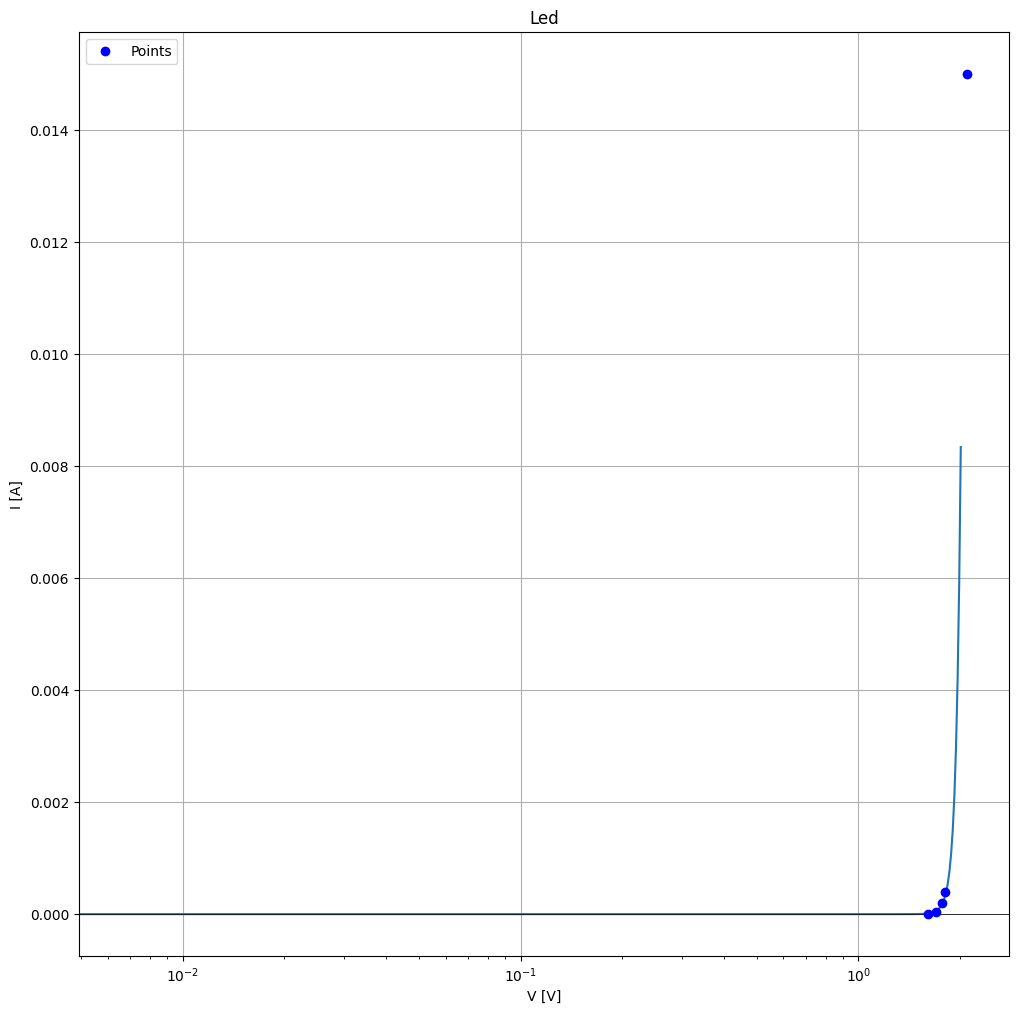

In [19]:
print(V_led)
print(I_led)
plt.figure(figsize=(12, 12))
plt.errorbar(V_led, I_led, fmt='o', color='blue', label='Points', capsize=5)
plt.xscale("log")
plt.xlabel('V [V]')  
plt.ylabel('I [A]')  
plt.title('Led')  



a=16
k=9 * 10 ** (-17)
Vplot = np.linspace(-0.1, 2.01, 100)
# evita esattamente zero se a<0 o se vuoi evitare problemi numerici
Vplot = Vplot[Vplot != 0]

Iplot = k * math.e ** (a * Vplot)

plt.plot(Vplot, Iplot)
plt.axvline(0, color='k', linewidth=0.5)

plt.legend(loc='upper left')
#print("R=",slope)
#print(1/intercept)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True) 
plt.show()

In [20]:
V_monte=np.array(data.iloc[:,12])
I_monte=np.array(modulatore(data.iloc[:,14], 1))

print(V_monte)
print(I_monte)




[-20 -16 -12  -8  -4   0   4   8  12  16  20]
[-3.4 -2.7 -2.  -1.4 -0.7  0.   0.6  1.3  2.   2.7  3.4]


R= 555754.5164718383


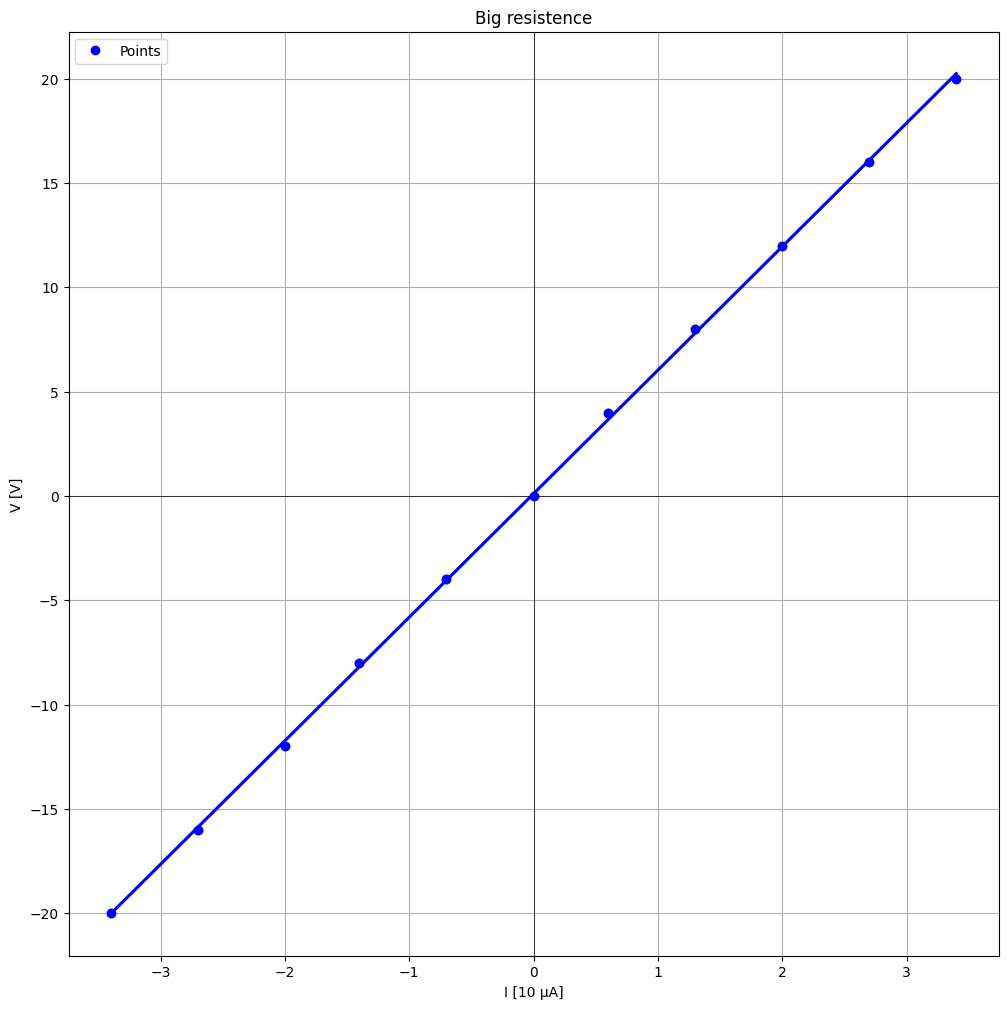

Chi-quadro: 0.36149030528451187
Chi-quadro ridotto: 0.040165589476056876


In [21]:
plt.figure(figsize=(12, 12))
plt.errorbar(I_monte, V_monte, fmt='o', color='blue', label='Points', capsize=5)
sns.regplot(x=I_monte, y=V_monte, ci=None, line_kws={"color": "blue"})
plt.xlabel("I [10 µA]")   
plt.ylabel("V [V]")   
plt.title('Big resistence')  


slope, intercept, r_value, p_value, std_err = stats.linregress(I_pr, V_pr)
plt.legend(loc='upper left')
print("R=",slope)

ax = plt.gca()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.get_xaxis().get_offset_text().set_visible(False)

#print(1/intercept)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True) 
plt.show()


V_pred = slope * I_pr + intercept

# Se hai un'incertezza nota su V, usala qui
sigma = np.ones_like(V_pr)  # se non hai incertezza, metti 1

# Calcolo chi-quadro
chi2 = np.sum(((V_pr - V_pred) / sigma) ** 2)
dof = len(V_pr) - 2  # gradi di libertà = numero dati - numero parametri stimati
reduced_chi2 = chi2 / dof

print("Chi-quadro:", chi2)
print("Chi-quadro ridotto:", reduced_chi2)